<a href="https://colab.research.google.com/github/MpRonald/TensorFlow_2.0/blob/main/TF2_Concolutional_Neurals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [6]:
tf.__version__

'2.8.2'

### Pre Processing

In [7]:
class_names = ['airplaine', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
               'horse', 'ship', 'truck']

In [8]:
# loading dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


### Images Normalization

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

Image 10


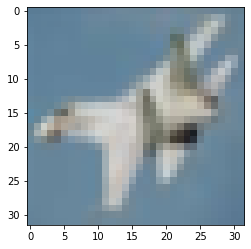

Image 11


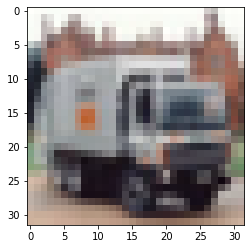

Image 12


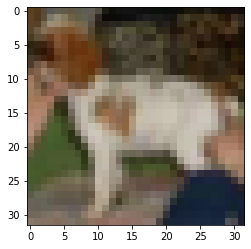

Image 13


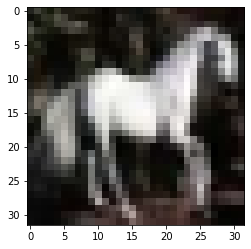

Image 14


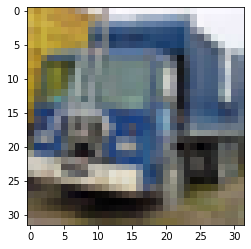

Image 15


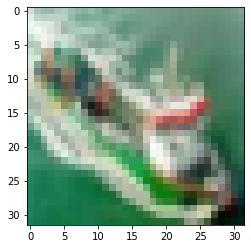

In [15]:
for i in range(10,16):
    print(f"Image {i}")
    plt.imshow(X_test[i])
    plt.show()

### Builting model

In [16]:
model = tf.keras.models.Sequential()

# layer 1
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',
                                 activation='relu', input_shape=[32,32,3]))

In [20]:
# layer 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
# maxpooling 1
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
# layer 3
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
# layer 4
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
# maxpooling 2
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
# flattening
model.add(tf.keras.layers.Flatten())
# dense layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
# output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          9

###Compilation

In [21]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['sparse_categorical_crossentropy'])
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 144s 92ms/step - loss: 1.6491 - sparse_categorical_crossentropy: 1.6491
Epoch 2/5
1563/1563 [==============================] - 137s 87ms/step - loss: 1.1894 - sparse_categorical_crossentropy: 1.1894
Epoch 3/5
1563/1563 [==============================] - 135s 87ms/step - loss: 0.9930 - sparse_categorical_crossentropy: 0.9930
Epoch 4/5
1563/1563 [==============================] - 137s 87ms/step - loss: 0.8752 - sparse_categorical_crossentropy: 0.8752
Epoch 5/5
1563/1563 [==============================] - 137s 88ms/step - loss: 0.7926 - sparse_categorical_crossentropy: 0.7926


###Evaluate Model

In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 12s 38ms/step - loss: 0.8804 - sparse_categorical_crossentropy: 0.8804
Test Accuracy: 0.880445122718811


In [23]:
test_loss

0.880445122718811